# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 13
---
Pertemuan 13 (tigabelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai MMembangun Model 4 (Dasar ANN). silakan Anda kerjakan Latihan 1 s/d 10. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# About Iris dataset
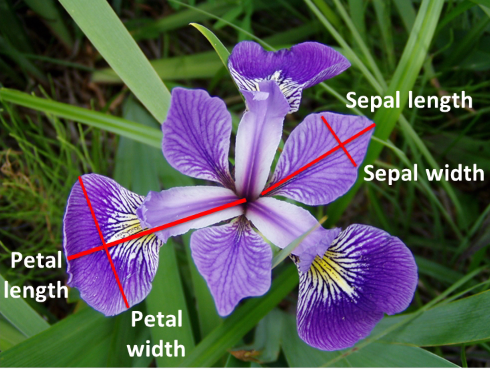

The iris dataset contains the following data **(Before Cleansing)**
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

### The variables are:
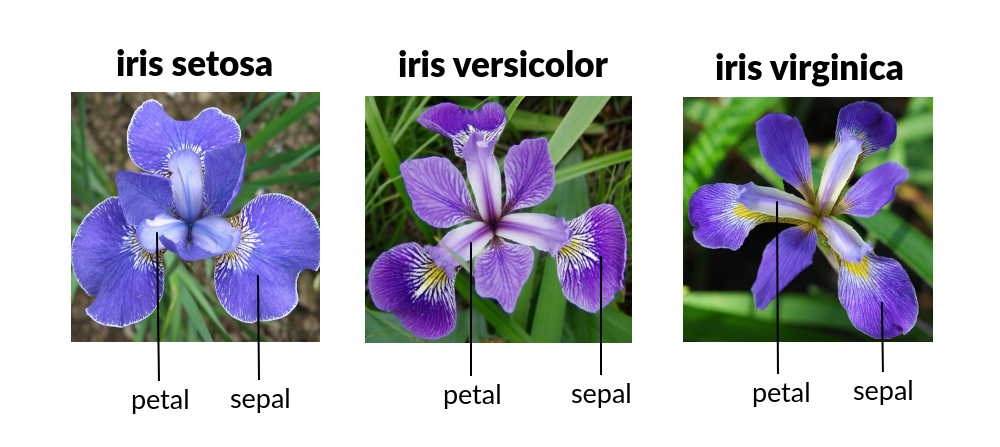

* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

## What is Deep Learning?

Deep Learning adalah subbidang machine learning yang berkaitan dengan algoritma yang terinspirasi oleh struktur dan fungsi otak yang disebut jaringan saraf tiruan / artificial neural networks (ANN). Deep learning adalah teknik machine learning yang mengajarkan komputer untuk melakukan apa yang terjadi secara alami pada manusia: belajar dengan memberi contoh. Deep learning adalah teknologi utama di balik mobil tanpa pengemudi, memungkinkan mereka mengenali tanda berhenti, atau membedakan pejalan kaki dari tiang lampu. Ini adalah kunci untuk kontrol suara di perangkat konsumen seperti ponsel, tablet, TV, dan speaker handsfree.

## What are artificial neural networks?

artificial neuron network (ANN) adalah model komputasi berdasarkan struktur dan fungsi jaringan saraf biologis. Informasi yang mengalir melalui jaringan mempengaruhi struktur ANN karena jaringan saraf berubah - atau belajar, dalam arti tertentu - berdasarkan input dan output tersebut. ANN dianggap sebagai alat pemodelan data statistik nonlinier di mana hubungan kompleks antara input dan output dimodelkan atau pola ditemukan. ANN juga dikenal sebagai jaringan saraf / neural network.

# Latihan (1)

## Melakukan import library yang dibutuhkan

In [213]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')


# Latihan (2)
## Review dataset

dataset yang digunakan merupakan Iris_AfterClean.csv dimana dataset ini sudah melewati proses cleansing sehingga tidak ada lagi outlier ataupun missing value!


In [214]:
#Panggil file (load file bernama Iris_AfterClean.csv) dan simpan dalam dataframe Lalu tampilkan 5 baris awal dataset dengan function head()
df = pd.read_csv('Iris_AfterClean.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa


In [215]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
 4   Species        140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [216]:
# melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,140.000000,140.000000,140.000000,140.000000
mean,5.902857,3.028571,3.910714,1.262857
std,0.819365,0.398791,1.720369,0.746825
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.675000,0.400000
50%,5.850000,3.000000,4.500000,1.400000
75%,6.425000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


# Latihan (3)

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Species', ylabel='count'>

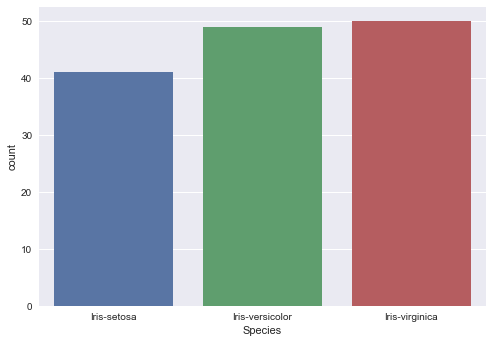

In [217]:
# Melihat distribusi data dari target classes --> Species
sns.countplot(data=df, x='Species')

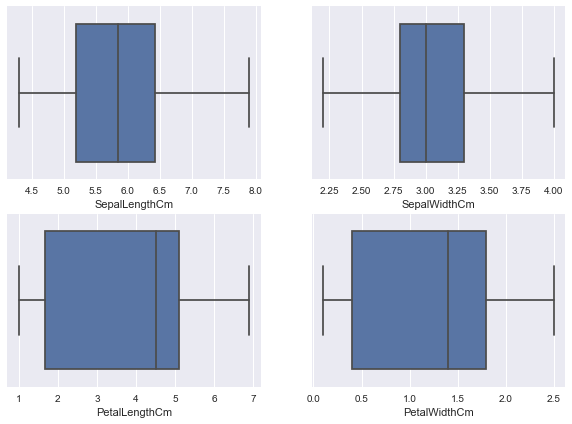

In [218]:
# Plotting boxplots untuk memeriksa distribusi kolom numerik
cols = df.columns[:-1].tolist()
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
r = c = 0
for col in cols:
  sns.boxplot(x=col, data=df, ax=ax[r,c])
  if c == 1:
    r+=1
    c = 0
    continue
  c+=1


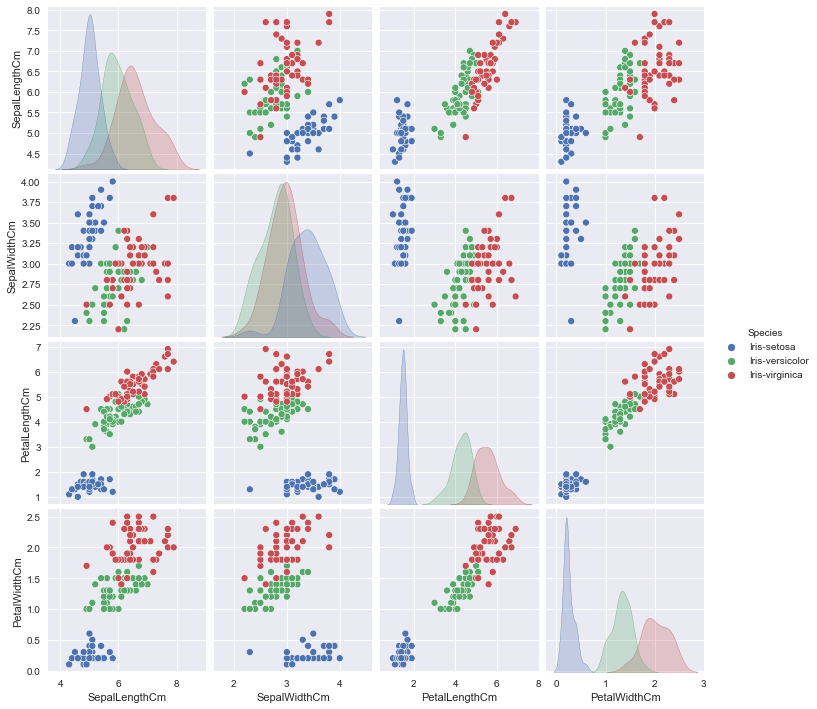

In [219]:
# visualisasikan kolom numerik yang dikelompokkan berdasarkan spesies
sns.pairplot(df, hue='Species')

Untuk memvisualisasikan variabel multi-dimensi kita dapat menggunakan teknik yang disebutkan di bawah:
[<a href="https://www.kaggle.com/benhamner/python-data-visualizations">selengkapnya</a>]

- Andrews Curves
- Parallel Coordinates

<AxesSubplot:>

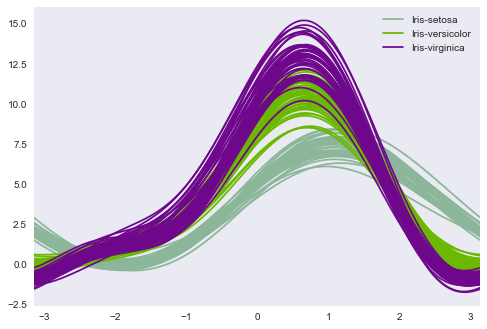

In [220]:
'''
Satu teknik pandas yang lebih canggih dan keren telah tersedia disebut Andrews Curves.
Kurva Andrews melibatkan penggunaan atribut sampel sebagai koefisien untuk deret Fourier
dan kemudian mem plotting ini
'''

from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<AxesSubplot:>

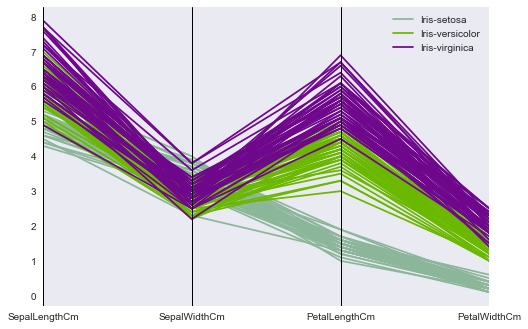

In [221]:
'''
Teknik visualisasi multivariat lain yang dimiliki pandas adalah parallel_coordinates.
Koordinat paralel memplot setiap fitur pada kolom terpisah & kemudian menggambar garis
menghubungkan fitur untuk setiap sampel data
'''

from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "Species")


# Data Preparation
___

# Latihan (4)
### a) Train-Test Split

In [222]:
# definisi variabel X / data feature dan y / data targer (species):
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Karena ini adalah klasifikasi multikelas, label keluaran dikodekan satu kali untuk melatih ANN
y = pd.get_dummies(df['Species']).values

In [223]:
# split data train dan test dengan function train_test_split() dengan train_size=0.7, test_size=0.25 dan random_state=101

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.7, test_size=0.25, random_state=101)


# Latihan (5)
### b) Feature Scaling

In [224]:
# lakukan penskalaan min-maks
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Model Creation/Evaluation
___

# Latihan (6)
### a) Creating model

In [225]:
# Import library pada keras yang dibutuhkan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [226]:
# input_shape
X_train_scaled.shape[1:]

(4,)

In [227]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Membangun keras ANN untuk Klasifikasi Multiclass yaitu kelas keluaran yang saling eksklusif
  ''' 

  model = Sequential()
  options = {"input_shape": input_shape}

  # Menambahkan input dan hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
    
    
  # Menambahkan output layer yang memiliki 3 neuron, 1 per kelas 
  model.add(Dense(3, activation='softmax'))
    
    
  # Membuat instance adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model


In [228]:
# Menerapkan KerasClassifier Wrapper ke neural network
keras_cls = KerasClassifier(build_model)

# Latihan (7)

### b) Hyperparameter tuning

Layaknya parameter, hyperparameter adalah variabel yang memengaruhi output model. Bedanya, nilai hyperparameter tidak diubah selama model dioptimisasi. Dengan kata lain, nilai hyperparameter tidak bergantung pada data dan selalu kita ambil as given saat pendefinisian model. Dua model dengan jenis yang sama namun hyperparameter berbeda bisa memiliki bentuk (i.e. memberikan output) yang berbeda pula.

In [229]:
# import library EarlyStopping dan RandomizedSearchCV

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

In [230]:
param_dict = {
    "n_hidden": (2, 3),
    "n_neurons": tuple(range(2, 7)),
    "learning_rate": (3e-2, 3e-3, 3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

In [231]:
%%time
model_cv.fit(
    X_train_scaled, y_train, epochs=150,
    validation_data=(X_test_scaled, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)],
    verbose=0
)

1/1 [==============================] - 0s 115ms/step - loss: 1.0860 - accuracy: 0.3750
Wall time: 1min 23s


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BB621C4970>,
                   param_distributions={'learning_rate': (0.03, 0.003, 0.0003),
                                        'n_hidden': (2, 3),
                                        'n_neurons': (2, 3, 4, 5, 6)})

In [232]:
model_cv.best_params_

{'n_neurons': 3, 'n_hidden': 3, 'learning_rate': 0.03}

### Cetak best score dari model

In [233]:
model_cv.best_score_

0.9384469787279764

# Latihan (8)

### c) Training the model

In [234]:
# building model based on best set of parameters obtained from RandomSearchCV
best_set = model_cv.best_params_

model = build_model(learning_rate= best_set['learning_rate'], 
                    n_hidden= best_set['n_hidden'], n_neurons= best_set['n_neurons'])


In [235]:
model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data = (X_test_scaled,y_test),
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=10)],
    verbose=0
)

# Latihan (9)

### d) Plotting accuracy, loss of train and validation set

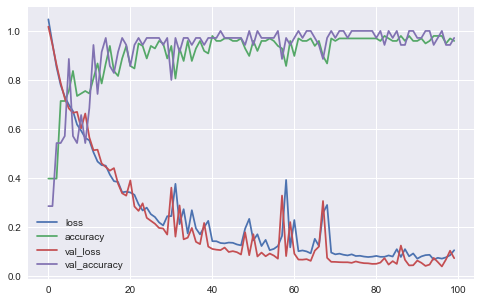

In [236]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

# Latihan (10)
### **e) Model evaluation**

In [237]:
from sklearn.metrics import classification_report, confusion_matrix

# Instead of probabilities it provides class labels
pred_classes = np.argmax(model.predict(X_test_scaled), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, pred_classes), "\n\n")
print(confusion_matrix(y_test_classes, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.94      0.97        16
           2       0.91      1.00      0.95        10

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.97        35
weighted avg       0.97      0.97      0.97        35
 


[[ 9  0  0]
 [ 0 15  1]
 [ 0  0 10]]


**Remarks:**

Dalam hal ini hanya beberapa parameter yang dipertimbangkan untuk penyetelan hyperparameter. Untuk hasil yang lebih baik, kita dapat mempertimbangkan berbagai macam batch_sizes, epochs, dll.